In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report , accuracy_score 
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.metrics import confusion_matrix 

In [14]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 17\SalaryData_Train(1).csv")
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: xlabel='Salary', ylabel='count'>

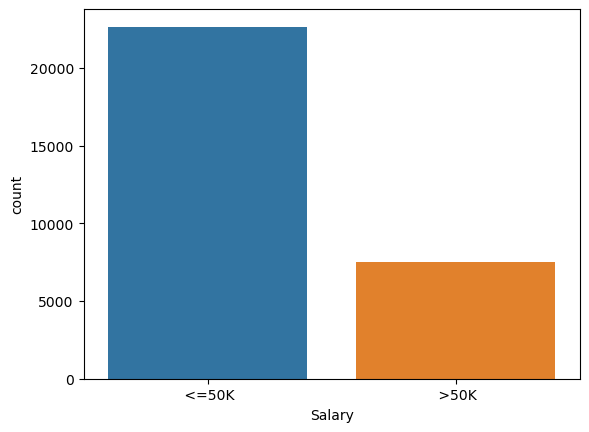

In [15]:
sns.countplot(x=data['Salary'])

In [16]:
le = LabelEncoder()
data['Salary'] = le.fit_transform(data['Salary'])

In [17]:
data = pd.get_dummies(data=data,columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
data = data.astype(int)

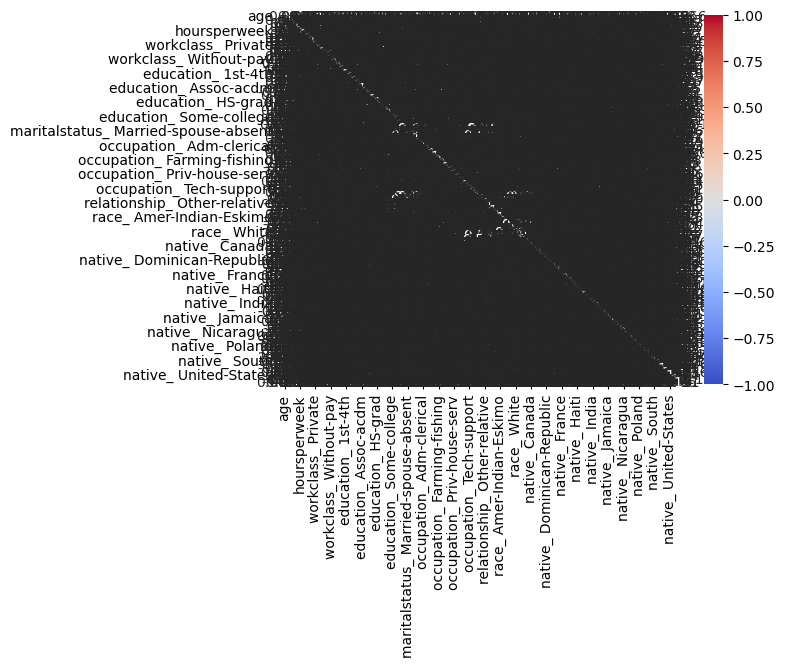

In [25]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

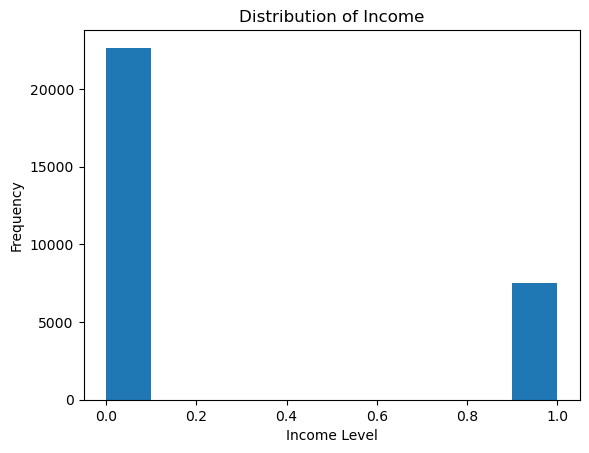

In [18]:
plt.hist(data['Salary'])
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

In [ ]:
x_train = data.drop(columns='Salary',inplace=False)
y_train = data['Salary']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train, test_size=0.3,random_state=45)

In [ ]:
clf = SVC(kernel='rbf',gamma=0.001)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred) *100

In [ ]:
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      6799
           1       0.84      0.54      0.66      2250

    accuracy                           0.86      9049
   macro avg       0.85      0.75      0.79      9049
weighted avg       0.86      0.86      0.85      9049

